# Multilayer perceptron for classification

## Health Insurance Cross Sell Prediction 


For this final project I am going to implement a classical feed-forward neural network to classify if customers who currently own a car insurance are interested in acquiring a health insurance

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


As we can see the dataset contains a total of 381109 records, which is quite a good amount to train an MLP

## Short Exploratory Data Analysis

The dataset seems to contain various categorical variables with name different categories:

In [16]:
train_df.Region_Code.value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [17]:
train_df.Policy_Sales_Channel.unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [19]:
train_df.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [20]:
train_df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

**This is a very important result which shows that the dataset in question has very unbalanced classes for prediction, which means that further processing will be needed to create a robust classifier**

In [21]:
train_df.Driving_License.value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [22]:
train_df.Previously_Insured.value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

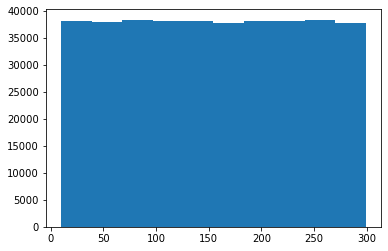

In [23]:
plt.hist((train_df.Vintage))
plt.show()

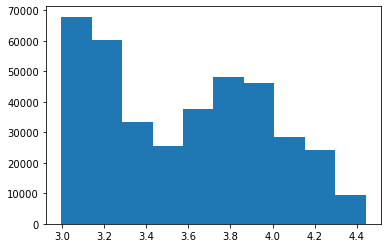

In [6]:
# I apply a log transformation to make the data distribution more gaussian
plt.hist(np.log(train_df.Age))
plt.show()

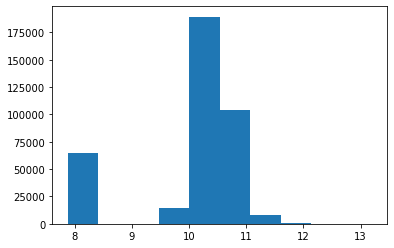

In [25]:
#I apply a log transformation to make the data distribution more gaussian

plt.hist(np.log(train_df.Annual_Premium))
plt.show()

In [27]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [28]:
train_df.Age

0         44
1         76
2         47
3         21
4         29
          ..
381104    74
381105    30
381106    21
381107    68
381108    46
Name: Age, Length: 381109, dtype: int64

## Data cleaning and feature engineering

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [32]:
onehot = OneHotEncoder(sparse = False)

In [33]:
# Transformation of variables to one hot vectors
vehicle_age_onehot = onehot.fit_transform(np.array(train_df.Vehicle_Age).reshape(-1,1))
region_code_onehot = onehot.fit_transform(np.array(train_df.Region_Code).reshape(-1,1))
policy_sales_onehot = onehot.fit_transform(np.array(train_df.Policy_Sales_Channel).reshape(-1,1))

In [35]:
Gender_onehot = np.array([i=='Male' for i in train_df.Gender ],dtype=np.int).reshape(-1,1)

In [36]:
Gender_onehot

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [37]:
Vehicle_Damage_onehot = np.array([i=='Yes' for i in train_df.Vehicle_Damage],dtype=np.int).reshape(-1,1)

In [38]:
minmax = MinMaxScaler()

In [39]:
# Scale of values to 0-1
age_scaled = minmax.fit_transform(np.array(train_df.Age).reshape(-1,1))
annual_premium_scaled = minmax.fit_transform(np.log(np.array(train_df.Annual_Premium)).reshape(-1,1))
vintage_scaled = minmax.fit_transform(np.array(train_df.Vintage).reshape(-1,1))

In [40]:
# Transformations necessary to create final dataframe

driving_license = np.array(train_df.Driving_License).reshape(-1,1)
previously_insured = np.array(train_df.Previously_Insured).reshape(-1,1)
y_train = np.array(train_df.Response).reshape(-1,1

In [42]:
clean_df = np.concatenate((vehicle_age_onehot, region_code_onehot, policy_sales_onehot, Gender_onehot, Vehicle_Damage_onehot, age_scaled, annual_premium_scaled, vintage_scaled, driving_license, previously_insured, y_train),axis = 1)

## Rebalancing of prediction classes

The approach we are going to take to create a dataset that will hopefully make the classifier more robust towards the classification of the positive class is to upsample (sample with replacement) the class which has less data points. On the contrary, to balance this out we will downsample (sample without replacement) the class which has more data points.

In [43]:
class_1 = clean_df[clean_df[:,218]==1]
class_0 = clean_df[clean_df[:,218]==0]

In [44]:
class_1 = np.array(pd.DataFrame(class_1).sample(n =  150000, replace = True))

In [45]:
class_0 = np.array(pd.DataFrame(class_0).sample(n =  150000, replace = False))

In [46]:
# Final dataframe is created
final_df = np.concatenate((class_1, class_0), axis=0)


In [47]:
# Check to see if numbers correspond to the correct amount of classes
final_df[:,218].sum()

150000.0

## Model selection and train/test split

In [48]:
from sklearn.model_selection import train_test_split 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(final_df[:,:218], final_df[:,218], test_size = 0.15)

## MLP architecture using keras

In [50]:
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [218]:
model = Sequential()
model.add(Dense(512, activation = "relu", input_shape = (1,218)))
model.add(Dropout(0.25))
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation = "sigmoid"))

In [219]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1, 512)            112128    
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 512)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 1, 1024)           525312    
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 1024)           0         
_________________________________________________________________
dense_17 (Dense)             (None, 1, 512)            524800    
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 512)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 1, 256)           

The idea behind this first architecture to be tested is to create a model with a moderate amount of trainable parameters, and check whether this has proper learning or if it will lead to overfitting of the training data.

In [244]:
model.compile(optimizer = "adagrad", loss = "binary_crossentropy", metrics = ['accuracy'])

Adagrad is used because it is more useful for very sparse features, which is the case of the one hot encoded categorical variables in our dataset. This is the case because it gives more importance (in terms of the update to weights) to less frequent features inside the dataset.

In [245]:
callbacks = [EarlyStopping(monitor='val_loss', patience=8),ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=False)]

In [51]:
X_train = np.expand_dims(X_train,axis = 2)
X_test = np.expand_dims(X_test, axis = 2)

In [52]:
X_train = X_train.reshape(-1, 1,218)

In [53]:
X_test = X_test.reshape(-1,1,218)

In [54]:
y_train = y_train.reshape(-1,1,1)

In [246]:
model.fit(X_train, y_train, epochs = 50, callbacks=callbacks, batch_size = 32, validation_split= 0.1, verbose = 1)

Train on 229500 samples, validate on 25500 samples
Epoch 1/50
229500/229500 [==============================] - 23s 100us/step - loss: 0.4329 - accuracy: 0.7977 - val_loss: 0.4208 - val_accuracy: 0.8025
Epoch 2/50
229500/229500 [==============================] - 22s 96us/step - loss: 0.4234 - accuracy: 0.8006 - val_loss: 0.4184 - val_accuracy: 0.8030
Epoch 3/50
229500/229500 [==============================] - 22s 97us/step - loss: 0.4196 - accuracy: 0.8023 - val_loss: 0.4153 - val_accuracy: 0.8026
Epoch 4/50
229500/229500 [==============================] - 22s 96us/step - loss: 0.4166 - accuracy: 0.8041 - val_loss: 0.4135 - val_accuracy: 0.8056
Epoch 5/50
229500/229500 [==============================] - 22s 95us/step - loss: 0.4137 - accuracy: 0.8059 - val_loss: 0.4124 - val_accuracy: 0.8045
Epoch 6/50
229500/229500 [==============================] - 22s 96us/step - loss: 0.4115 - accuracy: 0.8067 - val_loss: 0.4127 - val_accuracy: 0.8056
Epoch 7/50
229500/229500 [======================

KeyboardInterrupt: 

Training is stopped to modify strcuture as learning is ocurring quite slow, this is why we add batch normalization in the upper two layers. The structure is modified to create an inverted triangle of neurons per layer.

In [257]:
model = Sequential()
model.add(Dense(1024, activation = "relu", input_shape = (1,218)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [258]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 1, 1024)           224256    
_________________________________________________________________
batch_normalization_5 (Batch (None, 1, 1024)           4096      
_________________________________________________________________
dropout_39 (Dropout)         (None, 1, 1024)           0         
_________________________________________________________________
dense_51 (Dense)             (None, 1, 1024)           1049600   
_________________________________________________________________
batch_normalization_6 (Batch (None, 1, 1024)           4096      
_________________________________________________________________
dropout_40 (Dropout)         (None, 1, 1024)           0         
_________________________________________________________________
dense_52 (Dense)             (None, 1, 512)          

In [262]:
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.1)

In [263]:
model.compile(optimizer = adagrad , loss = "binary_crossentropy", metrics = ['accuracy'])

In [264]:
model.fit(X_train, y_train, epochs = 50, callbacks=callbacks, batch_size = 64, validation_split= 0.1, verbose = 1)

Train on 229500 samples, validate on 25500 samples
Epoch 1/50
229500/229500 [==============================] - 14s 60us/step - loss: 0.4327 - accuracy: 0.7950 - val_loss: 0.4255 - val_accuracy: 0.7982
Epoch 2/50
  2880/229500 [..............................] - ETA: 12s - loss: 0.4406 - accuracy: 0.7878

C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


229500/229500 [==============================] - 13s 58us/step - loss: 0.4283 - accuracy: 0.7973 - val_loss: 0.4208 - val_accuracy: 0.8006
Epoch 3/50
229500/229500 [==============================] - 13s 58us/step - loss: 0.4253 - accuracy: 0.7982 - val_loss: 0.4178 - val_accuracy: 0.8030
Epoch 4/50
229500/229500 [==============================] - 13s 58us/step - loss: 0.4237 - accuracy: 0.7996 - val_loss: 0.4206 - val_accuracy: 0.7998
Epoch 5/50
229500/229500 [==============================] - 13s 58us/step - loss: 0.4223 - accuracy: 0.7995 - val_loss: 0.4155 - val_accuracy: 0.8038
Epoch 6/50
229500/229500 [==============================] - 13s 57us/step - loss: 0.4208 - accuracy: 0.8004 - val_loss: 0.4158 - val_accuracy: 0.8025
Epoch 7/50
229500/229500 [==============================] - 13s 58us/step - loss: 0.4202 - accuracy: 0.8008 - val_loss: 0.4162 - val_accuracy: 0.8016
Epoch 8/50
229500/229500 [==============================] - 13s 58us/step - loss: 0.4185 - accuracy: 0.8012 - v

The model stops training because of the lack of improvement in val_loss

In [267]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 50, callbacks=callbacks, batch_size = 512, validation_split= 0.1, verbose = 1)

Train on 229500 samples, validate on 25500 samples
Epoch 1/50
229500/229500 [==============================] - 4s 16us/step - loss: 0.3762 - accuracy: 0.8238 - val_loss: 0.4029 - val_accuracy: 0.8164
Epoch 2/50
229500/229500 [==============================] - 3s 13us/step - loss: 0.3758 - accuracy: 0.8250 - val_loss: 0.4051 - val_accuracy: 0.8173
Epoch 3/50
229500/229500 [==============================] - 3s 13us/step - loss: 0.3741 - accuracy: 0.8249 - val_loss: 0.4014 - val_accuracy: 0.8178
Epoch 4/50
229500/229500 [==============================] - 3s 13us/step - loss: 0.3746 - accuracy: 0.8255 - val_loss: 0.3982 - val_accuracy: 0.8187
Epoch 5/50
229500/229500 [==============================] - 3s 13us/step - loss: 0.3723 - accuracy: 0.8255 - val_loss: 0.3985 - val_accuracy: 0.8181
Epoch 6/50
229500/229500 [==============================] - 3s 13us/step - loss: 0.3715 - accuracy: 0.8263 - val_loss: 0.4001 - val_accuracy: 0.8174
Epoch 7/50
229500/229500 [=============================

Modification of batch size and optimizer to ADAM to see if this helps in stabilizing training and leading to better results in terms of val_loss, but results end up the same. This may be caused by overfitting to training data, due to the large number of trainable parameters in the model.

In [8]:
model = Sequential()
model.add(Dense(1024, activation = "relu", input_shape = (1,218), activity_regularizer= tf.keras.regularizers.l1(0.0000025), bias_regularizer = tf.keras.regularizers.l1(0.0000025)))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu", activity_regularizer= tf.keras.regularizers.l1(0.0000025), bias_regularizer= tf.keras.regularizers.l1(0.0000025)))
model.add(BatchNormalization())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(32, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(16, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1, 1024)           224256    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1024)           4096      
_________________________________________________________________
dense_2 (Dense)              (None, 1, 512)            524800    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 512)            2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1, 256)            131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 256)            1024      
_________________________________________________________________
dense_4 (Dense)              (None, 1, 128)           

A simpler model is created, which batch normalization along all its layers, top layer is removed and the decrease of layer size is continued all the way up to 16.

In [10]:
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [11]:
callbacks = [ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=False)]

Since the data is very sparse and the number of features is limited, a greater batch_size along with a greater number of epochs are used to train the final model. The main reason is to stabilize training which will lead to the desired 0.85 accuracy in validation.

In [55]:
model.compile(optimizer = adagrad, loss = "binary_crossentropy", metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 1000, callbacks=callbacks, batch_size = 4096, validation_split= 0.15, verbose = 1)

Train on 216750 samples, validate on 38250 samples
Epoch 1/1000
216750/216750 [==============================] - 3s 16us/step - loss: 2.8260 - accuracy: 0.6348 - val_loss: 1.2190 - val_accuracy: 0.4958
Epoch 2/1000
 28672/216750 [==>...........................] - ETA: 0s - loss: 2.6347 - accuracy: 0.6902

C:\Users\jpcar\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


216750/216750 [==============================] - 1s 5us/step - loss: 2.5520 - accuracy: 0.6999 - val_loss: 1.1918 - val_accuracy: 0.4958
Epoch 3/1000
216750/216750 [==============================] - 1s 5us/step - loss: 2.3915 - accuracy: 0.7191 - val_loss: 1.1868 - val_accuracy: 0.4958
Epoch 4/1000
216750/216750 [==============================] - 1s 5us/step - loss: 2.2690 - accuracy: 0.7295 - val_loss: 1.1945 - val_accuracy: 0.4958
Epoch 5/1000
216750/216750 [==============================] - 1s 5us/step - loss: 2.1625 - accuracy: 0.7365 - val_loss: 1.2087 - val_accuracy: 0.4980
Epoch 6/1000
216750/216750 [==============================] - 1s 5us/step - loss: 2.0715 - accuracy: 0.7402 - val_loss: 1.2303 - val_accuracy: 0.5259
Epoch 7/1000
216750/216750 [==============================] - 1s 5us/step - loss: 1.9901 - accuracy: 0.7446 - val_loss: 1.2565 - val_accuracy: 0.5532
Epoch 8/1000
216750/216750 [==============================] - 1s 5us/step - loss: 1.9204 - accuracy: 0.7482 - val

216750/216750 [==============================] - 1s 5us/step - loss: 0.5796 - accuracy: 0.8114 - val_loss: 0.5798 - val_accuracy: 0.8090
Epoch 111/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.5765 - accuracy: 0.8113 - val_loss: 0.5783 - val_accuracy: 0.8088
Epoch 112/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.5754 - accuracy: 0.8109 - val_loss: 0.5764 - val_accuracy: 0.8089
Epoch 113/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.5729 - accuracy: 0.8119 - val_loss: 0.5751 - val_accuracy: 0.8088
Epoch 114/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.5703 - accuracy: 0.8120 - val_loss: 0.5731 - val_accuracy: 0.8089
Epoch 115/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.5687 - accuracy: 0.8133 - val_loss: 0.5718 - val_accuracy: 0.8096
Epoch 116/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.5656 - accuracy: 

Epoch 164/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4993 - accuracy: 0.8298 - val_loss: 0.5242 - val_accuracy: 0.8178
Epoch 165/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4972 - accuracy: 0.8305 - val_loss: 0.5236 - val_accuracy: 0.8172
Epoch 166/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4972 - accuracy: 0.8298 - val_loss: 0.5230 - val_accuracy: 0.8171
Epoch 167/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4967 - accuracy: 0.8299 - val_loss: 0.5223 - val_accuracy: 0.8178
Epoch 168/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4945 - accuracy: 0.8302 - val_loss: 0.5217 - val_accuracy: 0.8174
Epoch 169/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4943 - accuracy: 0.8309 - val_loss: 0.5211 - val_accuracy: 0.8182
Epoch 170/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.49

Epoch 218/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4562 - accuracy: 0.8446 - val_loss: 0.5012 - val_accuracy: 0.8243
Epoch 219/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4560 - accuracy: 0.8444 - val_loss: 0.5008 - val_accuracy: 0.8254
Epoch 220/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4547 - accuracy: 0.8443 - val_loss: 0.5005 - val_accuracy: 0.8251
Epoch 221/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4543 - accuracy: 0.8447 - val_loss: 0.5007 - val_accuracy: 0.8253
Epoch 222/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4540 - accuracy: 0.8452 - val_loss: 0.5004 - val_accuracy: 0.8255
Epoch 223/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4524 - accuracy: 0.8460 - val_loss: 0.4999 - val_accuracy: 0.8258
Epoch 224/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.45

Epoch 272/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4269 - accuracy: 0.8558 - val_loss: 0.4904 - val_accuracy: 0.8304
Epoch 273/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4258 - accuracy: 0.8562 - val_loss: 0.4913 - val_accuracy: 0.8295
Epoch 274/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4256 - accuracy: 0.8557 - val_loss: 0.4906 - val_accuracy: 0.8302
Epoch 275/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4253 - accuracy: 0.8557 - val_loss: 0.4906 - val_accuracy: 0.8299
Epoch 276/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4252 - accuracy: 0.8557 - val_loss: 0.4901 - val_accuracy: 0.8300
Epoch 277/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4236 - accuracy: 0.8574 - val_loss: 0.4897 - val_accuracy: 0.8308
Epoch 278/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.42

Epoch 326/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4037 - accuracy: 0.8648 - val_loss: 0.4863 - val_accuracy: 0.8336
Epoch 327/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4041 - accuracy: 0.8645 - val_loss: 0.4858 - val_accuracy: 0.8339
Epoch 328/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4034 - accuracy: 0.8651 - val_loss: 0.4857 - val_accuracy: 0.8341
Epoch 329/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4020 - accuracy: 0.8656 - val_loss: 0.4857 - val_accuracy: 0.8348
Epoch 330/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4030 - accuracy: 0.8655 - val_loss: 0.4858 - val_accuracy: 0.8337
Epoch 331/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.4025 - accuracy: 0.8649 - val_loss: 0.4860 - val_accuracy: 0.8353
Epoch 332/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.40

Epoch 380/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3852 - accuracy: 0.8717 - val_loss: 0.4850 - val_accuracy: 0.8373
Epoch 381/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3843 - accuracy: 0.8731 - val_loss: 0.4855 - val_accuracy: 0.8365
Epoch 382/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3841 - accuracy: 0.8725 - val_loss: 0.4848 - val_accuracy: 0.8376
Epoch 383/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3844 - accuracy: 0.8726 - val_loss: 0.4854 - val_accuracy: 0.8374
Epoch 384/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3841 - accuracy: 0.8726 - val_loss: 0.4851 - val_accuracy: 0.8375
Epoch 385/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3841 - accuracy: 0.8722 - val_loss: 0.4854 - val_accuracy: 0.8379
Epoch 386/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.38

Epoch 434/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3688 - accuracy: 0.8794 - val_loss: 0.4855 - val_accuracy: 0.8411
Epoch 435/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3683 - accuracy: 0.8805 - val_loss: 0.4860 - val_accuracy: 0.8413
Epoch 436/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3689 - accuracy: 0.8786 - val_loss: 0.4865 - val_accuracy: 0.8410
Epoch 437/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3685 - accuracy: 0.8785 - val_loss: 0.4865 - val_accuracy: 0.8404
Epoch 438/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3675 - accuracy: 0.8796 - val_loss: 0.4863 - val_accuracy: 0.8403
Epoch 439/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3688 - accuracy: 0.8793 - val_loss: 0.4875 - val_accuracy: 0.8401
Epoch 440/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.36

Epoch 488/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3544 - accuracy: 0.8853 - val_loss: 0.4878 - val_accuracy: 0.8427
Epoch 489/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3537 - accuracy: 0.8850 - val_loss: 0.4870 - val_accuracy: 0.8440
Epoch 490/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3563 - accuracy: 0.8843 - val_loss: 0.4875 - val_accuracy: 0.8430
Epoch 491/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3552 - accuracy: 0.8845 - val_loss: 0.4878 - val_accuracy: 0.8431
Epoch 492/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3546 - accuracy: 0.8847 - val_loss: 0.4881 - val_accuracy: 0.8436
Epoch 493/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3533 - accuracy: 0.8855 - val_loss: 0.4882 - val_accuracy: 0.8437
Epoch 494/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.35

Epoch 542/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3437 - accuracy: 0.8896 - val_loss: 0.4903 - val_accuracy: 0.8466
Epoch 543/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3436 - accuracy: 0.8892 - val_loss: 0.4904 - val_accuracy: 0.8467
Epoch 544/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3440 - accuracy: 0.8893 - val_loss: 0.4916 - val_accuracy: 0.8460
Epoch 545/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3433 - accuracy: 0.8897 - val_loss: 0.4903 - val_accuracy: 0.8468
Epoch 546/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3427 - accuracy: 0.8897 - val_loss: 0.4912 - val_accuracy: 0.8465
Epoch 547/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3432 - accuracy: 0.8894 - val_loss: 0.4914 - val_accuracy: 0.8459
Epoch 548/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.34

Epoch 596/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3345 - accuracy: 0.8924 - val_loss: 0.4967 - val_accuracy: 0.8468
Epoch 597/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3336 - accuracy: 0.8933 - val_loss: 0.4966 - val_accuracy: 0.8475
Epoch 598/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3321 - accuracy: 0.8936 - val_loss: 0.4963 - val_accuracy: 0.8472
Epoch 599/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3332 - accuracy: 0.8934 - val_loss: 0.4964 - val_accuracy: 0.8481
Epoch 600/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3322 - accuracy: 0.8946 - val_loss: 0.4964 - val_accuracy: 0.8479
Epoch 601/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3322 - accuracy: 0.8942 - val_loss: 0.4948 - val_accuracy: 0.8486
Epoch 602/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.33

Epoch 650/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3264 - accuracy: 0.8963 - val_loss: 0.5016 - val_accuracy: 0.8490
Epoch 651/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3232 - accuracy: 0.8978 - val_loss: 0.5012 - val_accuracy: 0.8487
Epoch 652/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3241 - accuracy: 0.8972 - val_loss: 0.5011 - val_accuracy: 0.8499
Epoch 653/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3231 - accuracy: 0.8976 - val_loss: 0.5002 - val_accuracy: 0.8488
Epoch 654/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3231 - accuracy: 0.8979 - val_loss: 0.4996 - val_accuracy: 0.8500
Epoch 655/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3252 - accuracy: 0.8964 - val_loss: 0.5015 - val_accuracy: 0.8493
Epoch 656/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.32

Epoch 704/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3153 - accuracy: 0.9009 - val_loss: 0.5036 - val_accuracy: 0.8508
Epoch 705/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3151 - accuracy: 0.9004 - val_loss: 0.5045 - val_accuracy: 0.8501
Epoch 706/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3165 - accuracy: 0.9001 - val_loss: 0.5062 - val_accuracy: 0.8499
Epoch 707/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3153 - accuracy: 0.9004 - val_loss: 0.5074 - val_accuracy: 0.8495
Epoch 708/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3156 - accuracy: 0.9011 - val_loss: 0.5063 - val_accuracy: 0.8501
Epoch 709/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3153 - accuracy: 0.9001 - val_loss: 0.5070 - val_accuracy: 0.8500
Epoch 710/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.31

Epoch 758/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3094 - accuracy: 0.9032 - val_loss: 0.5095 - val_accuracy: 0.8515
Epoch 759/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3094 - accuracy: 0.9030 - val_loss: 0.5104 - val_accuracy: 0.8519
Epoch 760/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3088 - accuracy: 0.9029 - val_loss: 0.5104 - val_accuracy: 0.8516
Epoch 761/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3094 - accuracy: 0.9028 - val_loss: 0.5114 - val_accuracy: 0.8519
Epoch 762/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3087 - accuracy: 0.9031 - val_loss: 0.5114 - val_accuracy: 0.8506
Epoch 763/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3087 - accuracy: 0.9029 - val_loss: 0.5107 - val_accuracy: 0.8517
Epoch 764/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.30

Epoch 812/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3025 - accuracy: 0.9053 - val_loss: 0.5155 - val_accuracy: 0.8529
Epoch 813/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3035 - accuracy: 0.9054 - val_loss: 0.5148 - val_accuracy: 0.8526
Epoch 814/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3021 - accuracy: 0.9054 - val_loss: 0.5176 - val_accuracy: 0.8515
Epoch 815/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3001 - accuracy: 0.9070 - val_loss: 0.5146 - val_accuracy: 0.8535
Epoch 816/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3021 - accuracy: 0.9051 - val_loss: 0.5157 - val_accuracy: 0.8526
Epoch 817/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.3024 - accuracy: 0.9050 - val_loss: 0.5161 - val_accuracy: 0.8543
Epoch 818/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.30

Epoch 866/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2960 - accuracy: 0.9080 - val_loss: 0.5202 - val_accuracy: 0.8536
Epoch 867/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2964 - accuracy: 0.9079 - val_loss: 0.5210 - val_accuracy: 0.8534
Epoch 868/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2960 - accuracy: 0.9080 - val_loss: 0.5204 - val_accuracy: 0.8546
Epoch 869/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2953 - accuracy: 0.9087 - val_loss: 0.5206 - val_accuracy: 0.8539
Epoch 870/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2960 - accuracy: 0.9087 - val_loss: 0.5208 - val_accuracy: 0.8545
Epoch 871/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2961 - accuracy: 0.9083 - val_loss: 0.5224 - val_accuracy: 0.8533
Epoch 872/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.29

Epoch 920/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2909 - accuracy: 0.9103 - val_loss: 0.5282 - val_accuracy: 0.8541
Epoch 921/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2908 - accuracy: 0.9103 - val_loss: 0.5244 - val_accuracy: 0.8544
Epoch 922/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2900 - accuracy: 0.9102 - val_loss: 0.5256 - val_accuracy: 0.8546
Epoch 923/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2908 - accuracy: 0.9104 - val_loss: 0.5270 - val_accuracy: 0.8535
Epoch 924/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2905 - accuracy: 0.9103 - val_loss: 0.5255 - val_accuracy: 0.8545
Epoch 925/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2912 - accuracy: 0.9097 - val_loss: 0.5266 - val_accuracy: 0.8544
Epoch 926/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.29

Epoch 974/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2873 - accuracy: 0.9113 - val_loss: 0.5298 - val_accuracy: 0.8558
Epoch 975/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2858 - accuracy: 0.9121 - val_loss: 0.5288 - val_accuracy: 0.8561
Epoch 976/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2866 - accuracy: 0.9112 - val_loss: 0.5296 - val_accuracy: 0.8557
Epoch 977/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2873 - accuracy: 0.9110 - val_loss: 0.5325 - val_accuracy: 0.8561
Epoch 978/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2859 - accuracy: 0.9120 - val_loss: 0.5314 - val_accuracy: 0.8551
Epoch 979/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.2861 - accuracy: 0.9121 - val_loss: 0.5321 - val_accuracy: 0.8550
Epoch 980/1000
216750/216750 [==============================] - 1s 5us/step - loss: 0.28

In [56]:
predictions = model.predict(X_test)

Even though validation loss starts increasing in the end, an improvement in accuracy is observed. This may be due to outputs of model being closer to the 0.5 decision threshold. In this way confidence in each prediction drops, but overall accuracy improves to better than 85%. 

In [63]:
predictions.flatten()

array([0.9756645 , 0.75092804, 0.00140766, ..., 0.91801   , 0.6943645 ,
       0.02278773], dtype=float32)

In [64]:
predictions_final = np.array([i > 0.5 for i in predictions.flatten()], dtype = np.int)

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [65]:
print(classification_report(predictions_final, y_test))

              precision    recall  f1-score   support

           0       0.77      0.94      0.84     18347
           1       0.95      0.80      0.87     26653

    accuracy                           0.86     45000
   macro avg       0.86      0.87      0.86     45000
weighted avg       0.88      0.86      0.86     45000



The classification report yields good pricision and recall values, along with an over f1 score value for the positive class. Final accuracy in test set is 86%.

In [69]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [79]:
from sklearn import metrics

In [75]:
y_test.shape

(45000,)

In [74]:
predictions.flatten().shape

(45000,)

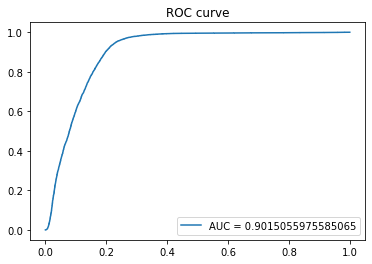

In [85]:

fpr, tpr, _ = metrics.roc_curve(y_test,  predictions.flatten())
auc = metrics.roc_auc_score(y_test, predictions.flatten())
plt.plot(fpr,tpr,label="AUC = "+str(auc))
plt.legend(loc=4)
plt.title('ROC curve')
plt.show()